In [3]:
import pandas as pd

In [4]:
loan=pd.read_csv('loan.csv')

In [8]:
loan.iloc[1].values

array(['LP001003', 'Male', 'Yes', '1', 'Graduate', 'No', 4583, 1508.0,
       128.0, 360.0, 1.0, 'Rural', 'N'], dtype=object)

In [ ]:
loan.head(1)

In [ ]:
loan.info()

In [ ]:
loan['Credit_History'].value_counts()

In [ ]:
loan['Loan_Status'].value_counts()

In [ ]:
loan['Loan_Status'].unique()

# 1.전처리

In [ ]:
loan.isnull().sum()

In [ ]:
loan['Gender'].unique()

In [ ]:
loan['Gender'].value_counts()

In [3]:
loan['Gender'].fillna('Male', inplace=True) ###################

In [ ]:
loan['Married'].value_counts()

In [4]:
loan['Married'].fillna('Yes', inplace=True) ###################

In [ ]:
loan['Dependents'].unique()

In [ ]:
loan['Dependents'].value_counts()

In [5]:
loan['Dependents'].fillna(0, inplace=True) #################

In [6]:
loan['Dependents'].replace('3+', 3, inplace=True) ###################

In [7]:
loan['Dependents']=loan['Dependents'].astype(int) ###############

In [ ]:
loan['Self_Employed'].unique()

In [ ]:
loan['Self_Employed'].value_counts()

In [8]:
loan['Self_Employed'].fillna('No', inplace=True) #################

In [ ]:
loan['LoanAmount'].describe()

In [9]:
loan['LoanAmount'].fillna(loan['LoanAmount'].median(), inplace=True) ##################

In [ ]:
loan['Loan_Amount_Term'].unique()

In [ ]:
loan['Loan_Amount_Term'].value_counts()

In [10]:
loan['Loan_Amount_Term'].fillna(360, inplace=True) ################

In [ ]:
loan['Credit_History'].unique()

In [ ]:
loan['Credit_History'].value_counts()

In [11]:
loan['Credit_History'].fillna(1, inplace=True) #####################

In [ ]:
loan.info()

In [12]:
from sklearn.preprocessing import LabelEncoder #################

In [ ]:
loan.columns

In [13]:
#null값 처리 부터 하고 바꿔야함.
col_list = ['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for col in col_list : 
    label = LabelEncoder()
    label.fit(loan[col].unique())
    loan[col] = label.transform(loan[col])

In [ ]:
loan

In [ ]:
loan.info()

In [ ]:
loan.isnull().sum()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
corr = loan.corr().round(2)

<AxesSubplot:>

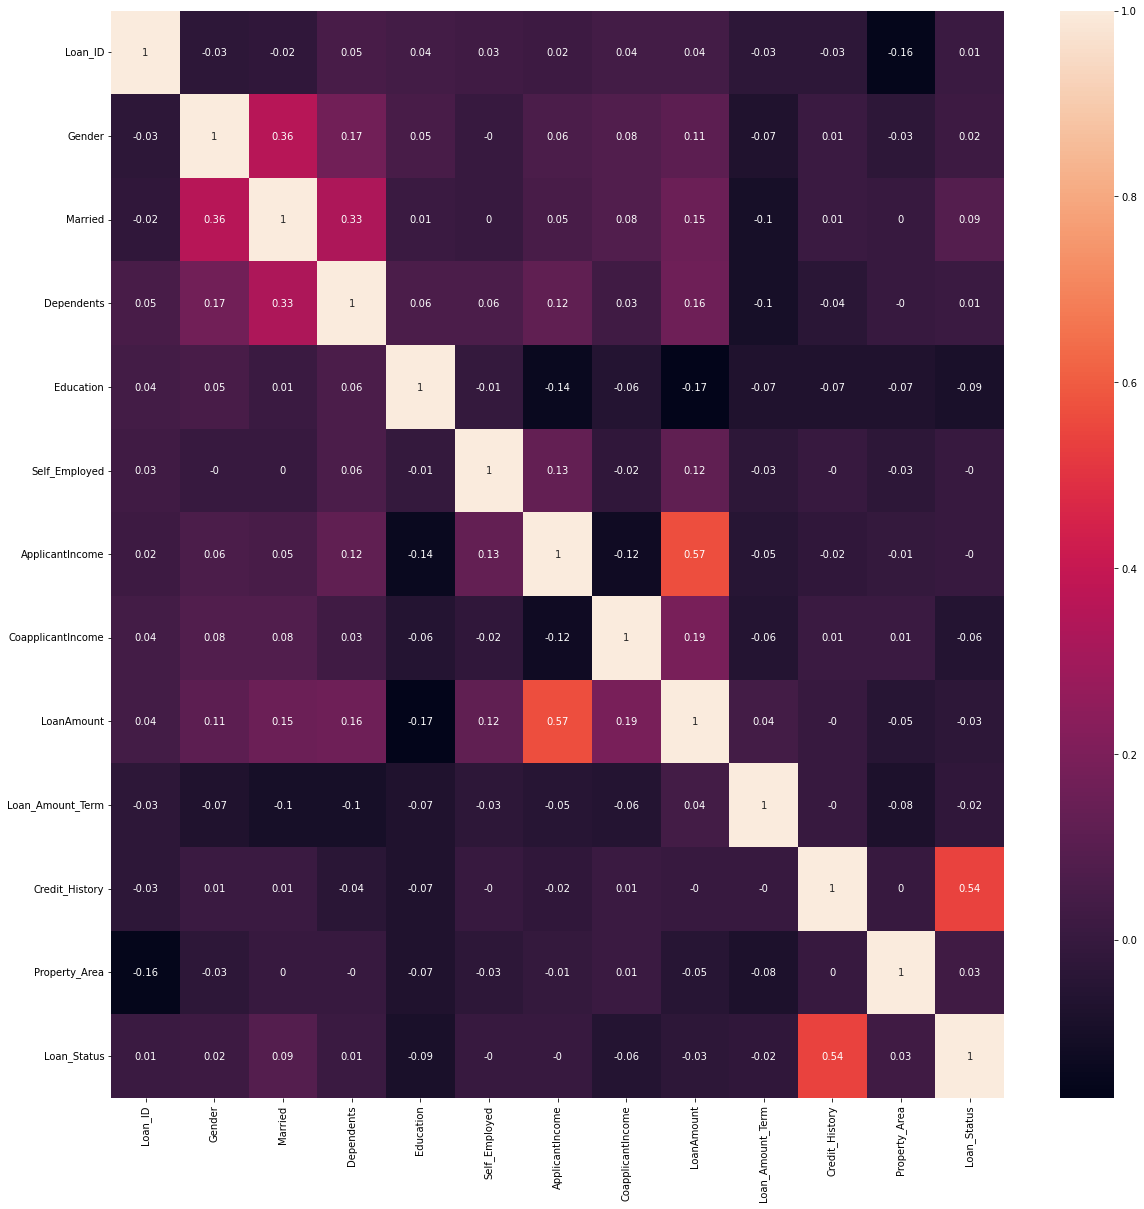

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

# 2.모델 검정

In [ ]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
import numpy as np

In [ ]:
model=SVC()

In [ ]:
x= loan.drop(['Loan_Status','Loan_ID'], axis=1)

In [ ]:
y = loan['Loan_Status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=0, stratify=y)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
model.score(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
model2.fit(x_train, y_train)

In [ ]:
model2.score(x_train, y_train)

In [ ]:
model2.score(x_test, y_test)

In [ ]:
model3.fit(x_train, y_train)

In [ ]:
model3.score(x_train, y_train)

In [ ]:
model3.score(x_test, y_test)

In [ ]:
from tqdm import tqdm

In [ ]:
final_data=[]
ker_name = ['rbf','poly','sigmoid','linear','precomputed']
for c in tqdm(range(1,5)) : 
    for i in range(1, 10) : 
        for k in ker_name :
            gamma = 0.001 * i
            model = SVC(kernel=k, C=c, gamma=gamma)
            #print(gamma, model)
            model.fit(x_train,y_train)
            ret1 = model.score(x_train, y_train)
            ret2 = model.score(x_test, y_test)
            temp=[]
            temp.append(k)
            temp.append(c)
            temp.append(gamma)
            temp.append(ret1)
            temp.append(ret2)
            final_data.append(temp)

In [ ]:
df = pd.DataFrame(final_data, columns = ['Kernel','C','gamma','train','test'])

In [ ]:
df.sort_values(by=['test','train'], ascending= False).head(20)

In [ ]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
model1 = SVC()
model2 = LogisticRegression()
model3 = LogisticRegressionCV()

In [ ]:
x= loan.drop(['Loan_Status','Loan_ID'], axis=1)

In [ ]:
y = loan['Loan_Status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0, stratify=y)

In [ ]:
model1.fit(x_train, y_train)

In [ ]:
model1.score(x_train, y_train)

In [ ]:
model1.score(x_test, y_test)

In [ ]:
model2.fit(x_train, y_train)

In [ ]:
model2.score(x_train, y_train)

In [ ]:
model2.score(x_test, y_test)

In [ ]:
model3.fit(x_train, y_train)

In [ ]:
model3.score(x_train, y_train)

In [ ]:
model3.score(x_test, y_test)

In [ ]:
d = [(x_train, y_train), (x_test, y_test)]

In [ ]:
def trainModel(model, d):
    for i, x in enumerate(d) : 
        if(i==0) :
            model.fit(x[0],x[1])
            print('train', model.score(x[0], x[1]))
        else :
            print('test', model.score(x[0], x[1]))   

In [ ]:
trainModel(model1, d)

In [ ]:
trainModel(model2, d)

In [ ]:
trainModel(model3, d)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
model =LogisticRegressionCV()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
model.score(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

# 3. 실제 데이터로 적용